# Exemple d'utilisation de Pandas

Voici un carnet qui décrit les bases de Pandas, une librairie Python permettant d'analyser et de manipuler des données. Vous pouvez trouver davantages de détails sur le [site internet de Pandas](https://pandas.pydata.org/).

Cet exemple utlise une base de données contenant une description des missions spatiales depuis effectuées depuis 1957. Elle provient du site [Kaggle](https://www.kaggle.com/agirlcoding/all-space-missions-from-1957)  

Les détails des données se trouvent [ici](https://www.kaggle.com/agirlcoding/all-space-missions-from-1957)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Chargement des données

Les données sont au format CSV. Elles sont séparées par des virgules. Pandas assume que la première ligne contient le nom des colonnes mais si le nom des colonnnes n'est pas donné dans le fichier, il est possible de l'indiquer "à la main" à Pandas.  
La fonction `read_csv` retourne une [classe Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) qui supporte de nombreuses fonctions.
  
Pandas peut lire de nombreux types de fichiers, comme le CSV, Excel, et bien d'autres. Pandas peut lire des données depuis un fichier, depuis un lien HTTP, FTP ou encore depuis un serveur S3. Vous trouverez davantage d'informations dans [la documentation de Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

### Télchargement des données depuis un dépôt Github

Pour télécharger les données stockées dans un fichier sauvegardé sur un dépôt github, on peut procéder comme suit :

```
!mkdir data
!wget https://raw.githubusercontent.com/AlexandreBourrieau/ML-F1/master/Carnets%20Jupyter/Donn%C3%A9es/All%20Space%20Missions%20from%201957.csv -P data
```

In [ ]:
!mkdir data
!wget https://raw.githubusercontent.com/AlexandreBourrieau/ML-F1/master/Carnets%20Jupyter/Donn%C3%A9es/All%20Space%20Missions%20from%201957.csv -P data

--2020-09-08 14:19:21--  https://raw.githubusercontent.com/AlexandreBourrieau/ML-F1/master/Carnets%20Jupyter/Donn%C3%A9es/All%20Space%20Missions%20from%201957.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628652 (614K) [text/plain]
Saving to: ‘data/All Space Missions from 1957.csv’

All Space Missions  100%[===================>] 613.92K  --.-KB/s    in 0.09s   

2020-09-08 14:19:21 (6.50 MB/s) - ‘data/All Space Missions from 1957.csv’ saved [628652/628652]



In [ ]:
#Noms_colonnes = ['Nnum','Unnamed','Company Name','Location','Datum','Detail','Status Rocket','Rocket','Status Mission']

# La première ligne contient le nom des colonnes, dans le cas contraire il faut les spécifier
#missions = pd.read_csv('data/All Space Missions from 1957.csv', sep=',', names = Noms_colonnes)
missions = pd.read_csv('data/All Space Missions from 1957.csv', sep=',')


print('Nombre total de missions : %d' % len(missions))

Nombre total de missions : 4324


Affiche les premières lignes des données avec la fonction `head`. La fonction `tail` affiche les dernières lignes. Les deux fonctions retournent un objet Dataframe contenant une liste de lignes.

In [ ]:
missions.head(5)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Sélection de lignes et de colonnes

Une ou plusieurs lignes peuvent être sélectionnées depuis l'objet Dataframe de manière simple. L'objet retourné est encore un  objet de type Dataframe.

In [ ]:
missions[1:5]

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Les colonnes peuvent être sélectionnées en utlisant la syntaxe suivante. Dans cet exemple, deux colonnes et 5 lignes sont sélectionnées.

In [ ]:
missions[['Location', 'Detail']].head(5)

,Location,Detail
0,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT
2,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop
3,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103
4,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance


Les lignes peuvent être sélectionnées avec des filtres. La syntaxe SQL est aussi supportée. Les détails se trouvent [ici](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html).

In [ ]:
missions[(missions['Location'].str.contains('Florida')) & (missions['Detail'].str.contains('V 541'))]

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
267,267,267,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Mar 01, 2018 22:02 UTC",Atlas V 541 | GOES-S (GOES-17),StatusActive,145.0,Success
394,394,394,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Sat Nov 19, 2016 23:42 UTC",Atlas V 541 | GOES-R (GOES-16),StatusActive,145.0,Success
563,563,563,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Apr 10, 2014 17:45 UTC",Atlas V 541 | NROL-67,StatusActive,145.0,Success
662,662,662,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Sat Nov 26, 2011 15:02 UTC",Atlas V 541 | Mars Science Laboratory,StatusActive,145.0,Success


Les lignes peuvent être sélectionnées par des index, soit numériques ou avec les labels. Les détails sont [ici](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html). La sélection numérique est réalisée avec la fonction ```iloc()```.

In [ ]:
# Sélection d'une seule valeur en se basant sur les index

missions.iloc[4]['Company Name']

'ULA'

In [ ]:
# Sélection de quelques lignes en utilisant un intervalle

missions.iloc[1:5]

1         CASC
2       SpaceX
3    Roscosmos
4          ULA
Name: Company Name, dtype: object

## Inspection des données

Les cellules suivantes permettent dobtenir des informations sur les objets Dataframe, ce qui peut être très utile pendant la phase préliminaire d'analyse.

In [ ]:
missions.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', 'Rocket', 'Status Mission'],
      dtype='object')

La fonction `describe` donne des informations statistiques sur les colonnes à valeurs numériques.

In [ ]:
missions.describe()

,Unnamed: 0,Unnamed: 0.1
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


Pandas essaye de déteriner le type de données de chaque colonne.  Si une colonne contient différents types de données, ce type est assumé comme "objet".  
Les types gérés par Pandas se trouvent [ici](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html). 

In [ ]:
missions.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
Rocket            object
Status Mission    object
dtype: object

## Les objects de type "Series"

Les colonnes dans le Dataframe Pandas sont des instances de la classe [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html). La classe "Series" contient de nombreuses fonctions. Voici un exemple : 


In [ ]:
missions['Company Name'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

La propriétée ```values``` retourne un tableau NumPy.

In [ ]:
missions[1:5].Rocket.values

array(['29.75 ', nan, '65.0 ', '145.0 '], dtype=object)

## Tri

Les objets Dataframe et Series peuvent être triés par une ou plusieurs colonnes.

Dans l'exemple suivant, la colonne "Datum" est de type objet et non de type "datetime". Le tri n'est donc pas possible :

In [ ]:
missions.sort_values(by='Rocket', ascending=True).head(50)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
3683,3683,3683,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 04, 1968 12:00 UTC",Saturn V | Apollo 6,StatusRetired,"1,160.0",Partial Failure
3149,3149,3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 14, 1973 17:30 UTC",Saturn V | Skylab 1,StatusRetired,"1,160.0",Success
3180,3180,3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,"1,160.0",Success
3243,3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.0",Success
3384,3384,3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jan 31, 1971 21:03 UTC",Saturn V | Apollo 14,StatusRetired,"1,160.0",Success
3475,3475,3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.0",Success
3328,3328,3328,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Jul 26, 1971 13:34 UTC",Saturn V | Apollo 15,StatusRetired,"1,160.0",Success
3545,3545,3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.0",Success
3560,3560,3560,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun May 18, 1969 16:49 UTC",Saturn V | Apollo 10,StatusRetired,"1,160.0",Success
3584,3584,3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 03, 1969 16:00 UTC",Saturn V | Apollo 9,StatusRetired,"1,160.0",Success


## Conversion de types

Pour convertir le type d'une colonne, il faut tout d'abord copier la variable Dataframe puis effectuer les conversions sur cette variable.  
Dans l'exemple suivant, l'objet "Rocket" (prix de la mission en million de $) est de type chaine de caractère. Pour le convertir en flottant, nous sommes obligé de supprimer les virgules sinon nous obtenons une erreur.  

In [ ]:
# Cette méthode ne fonctionne pas
#issions2 = missions.copy()
#missions2['Rocket'] = missions2['Rocket'].astype(float)

# Cette méthode fonctionne, il faut d'abord supprimer les virgules

missions2 = missions.copy()
missions2['Rocket'] = missions2['Rocket'].str.replace(",","").astype(float)
missions2.sort_values(by='Rocket', ascending=True).head(50)
missions2.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
Company Name       object
Location           object
Datum              object
Detail             object
Status Rocket      object
Rocket            float64
Status Mission     object
dtype: object

In [ ]:
missions2.dtypes

In [ ]:
missions2.describe()

On peut également vouloir copier uniquement les données qui sont exploitables, c'est-à-dire par exemple celles dont la valeur n'est pas égale à "Nan". 

In [ ]:
missions2 = missions[missions.Rocket.str.find("nan")<0].copy()
missions2['Rocket'] = missions2['Rocket'].str.replace(",","").astype(float)
missions2.sort_values(by='Rocket', ascending=True).head(50)

## Agrégation

La fonction groupby permet de regrouper des données par colonnes ou pas ensemble de colonnes et d'y appliquer des fonctions spécifiques, comme mean, min, max, etc ...

In [ ]:
missions2.groupby(['Company Name']).max()

In [ ]:
missions2.groupby(['Company Name', 'Status Mission']).max()

## Visualisation

Les objets Dataframe de Pandas contiennent des fonctions pour créer un très grand nombre de courbes en utilisant [Matplotlib](https://matplotlib.org). Les fonctions d'affichage de Pandas sont documentées dans [la documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

In [ ]:
missions2.hist('Rocket', bins=50)

In [ ]:
missions2.hist('Rocket', bins=50, cumulative=-1)

Essayons maintenant d'afficher la distribution de l'endroit des lancements en fonction du nom des companies.

In [ ]:
missions3.plot.scatter(x='Hash Location', y='Hash Company Name', color='red',figsize=[20, 20])

Affichons maintenant des statistiques sur le prix des missions en fonction des companies.

In [ ]:
PrixCompany = missions3.groupby(['Company Name'])['Rocket']
moyenne = PrixCompany.mean()
et = PrixCompany.std()

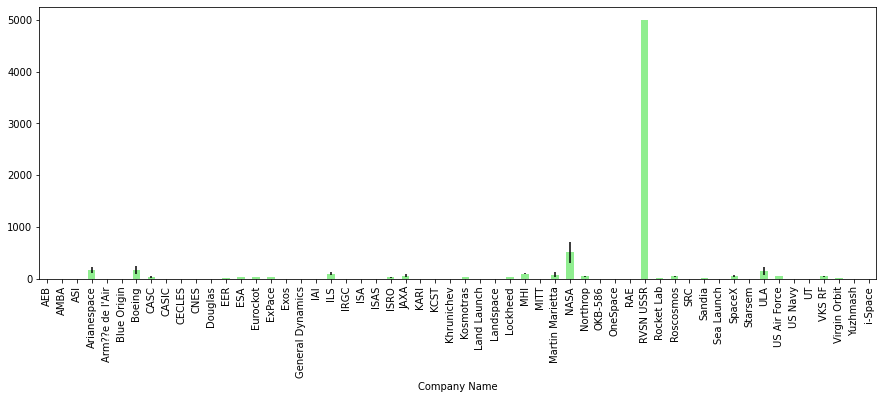

In [ ]:
fig, ax = plt.subplots()
moyenne.plot.bar(ax=ax, yerr=et, color='lightgreen', figsize=[15, 5])